## Requirement :- We have 'Caffee shop Sales' data, so we look at sales diffeent time of the day, different day of the week,differnet product sales over time.

In [76]:

# 1.check for null vales 
# 2.check for dtypes (df.info())
# 3.create extra columns using available columns if needed (sales and datetime)

# 4. check  number of purchases and sum of sales according to location of store.
# 5. create line graph for this daily sale by location so prepare data for visualisation
     # (create seperate df for visualization using groupby)

# 6.Time Series Analysis :daily_sales,weekly_sales,monthly_sales :create columns =df['day_of_week']=df['datetime'].dt.day_name()...reindex frm mon-sunday
#                                                                                =    df['month'] =df['datetime'].dt.to_period('M')
#            a)Monthly Sales Data Visualization
#            b)weekly Sales Data vizualization
#            c)Hourly Sales Data vizualization




# 7. Calculate Average Sales per Transaction
# 8. Sales by Product Type Data Visualization
# 9. Product Sales by Product Type Data Visualization
# 10.Hourly Sales by Location Data Visualization

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [75]:
df=pd.read_excel(r'Downloads/Coffee Shop Sales.xlsx')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [4]:
df.isnull().sum() #check for missing values

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
df.info() #to check dtype of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
#we want date and time as one column so converting 'transaction_time ' into 'timedelta' format

In [6]:
df['transaction_time']=df['transaction_time'].astype(str)
df['transaction_time']=pd.to_timedelta(df['transaction_time'])

In [8]:
df.info() #again run df.info() to check dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [9]:
df['sales']=df['transaction_qty']*df['unit_price'] # create new column called 'sales' .
df['datetime']=df['transaction_date']+df['transaction_time'] # create new column called 'datetime' by adding 2 column. 

In [10]:
#df.drop(columns=['transaction_date','transaction_time'],axis=1,inplace=True)
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [11]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [ ]:
# transaction quantity=  average  is 1.438 , std is 0.542509 , max number of transaction 8
# unit_price= average  is 3.382219	 , min to max range=0.800000- 45.000000 , std is 2.658723 
# sales= average 4.686367 incicate most transaction into small puerchases
# transaction_time = min to max=06:00:00-  20:59:32 i.e 9pmthus shop time is 6am to 9 pm 

In [12]:
# we want number of purchases and sum of sales according to location of store 

df_location=df.groupby("store_location").agg({'sales':'sum','transaction_id':'count'})
df_location

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [ ]:
#  'Hell's Kitchen' has max sales followed by 'Astoria' and followed by 'Lower Manhattan'.

In [13]:
# create line graph for this daily sale by location so prepare data for visualisation

Daily_sales=df.groupby(['transaction_date','store_location'])['sales'].sum()
Daily_sales

transaction_date  store_location 
2023-01-01        Astoria             868.40
                  Hell's Kitchen      851.45
                  Lower Manhattan     788.35
2023-01-02        Astoria             925.50
                  Hell's Kitchen      828.80
                                      ...   
2023-06-29        Hell's Kitchen     1298.55
                  Lower Manhattan    1299.45
2023-06-30        Astoria            1807.65
                  Hell's Kitchen     1904.93
                  Lower Manhattan    1768.74
Name: sales, Length: 543, dtype: float64

In [14]:
#unstack() =use = after you already grouped data  to transforms that data  into more readable,usable format 

Daily_sales_by_location=df.groupby(['transaction_date','store_location'])['sales'].sum().unstack()
Daily_sales_by_location
# in above data we have clumsy data but after untacking it store location's are columns and we can easily read the data

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


## 1] Daily sales Data Visualization

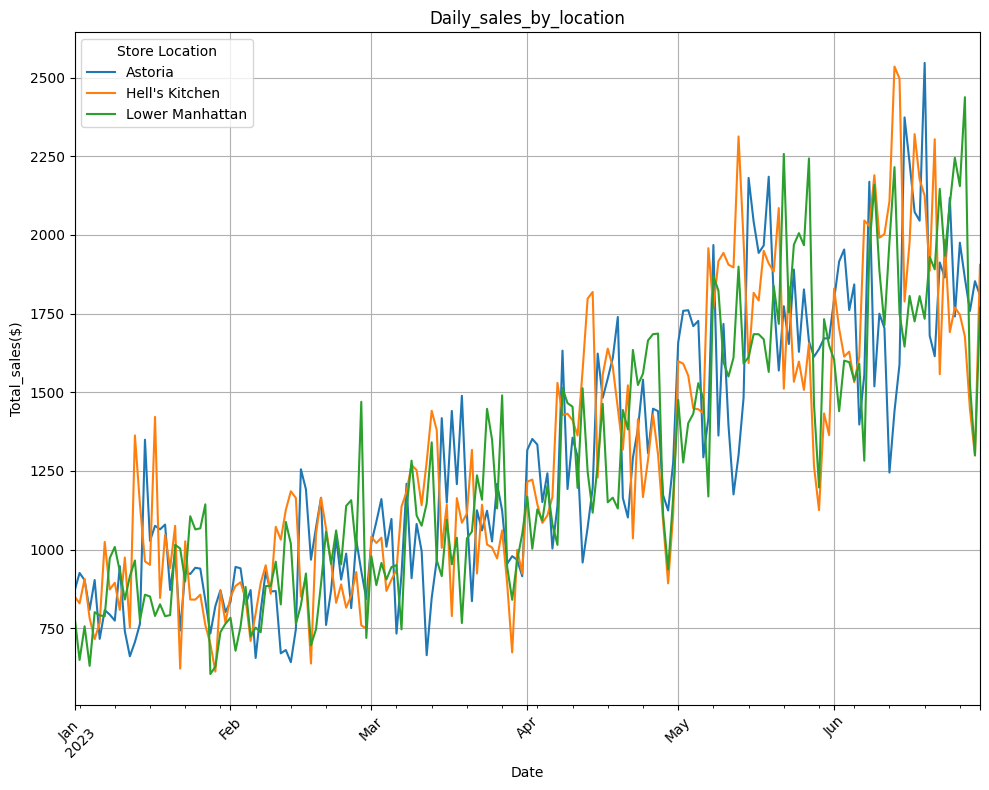

In [15]:
Daily_sales_by_location.plot(figsize=(10,8),title="Daily_sales_by_location")
plt.xlabel('Date')
plt.ylabel("Total_sales($)")
plt.legend(title="Store Location")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

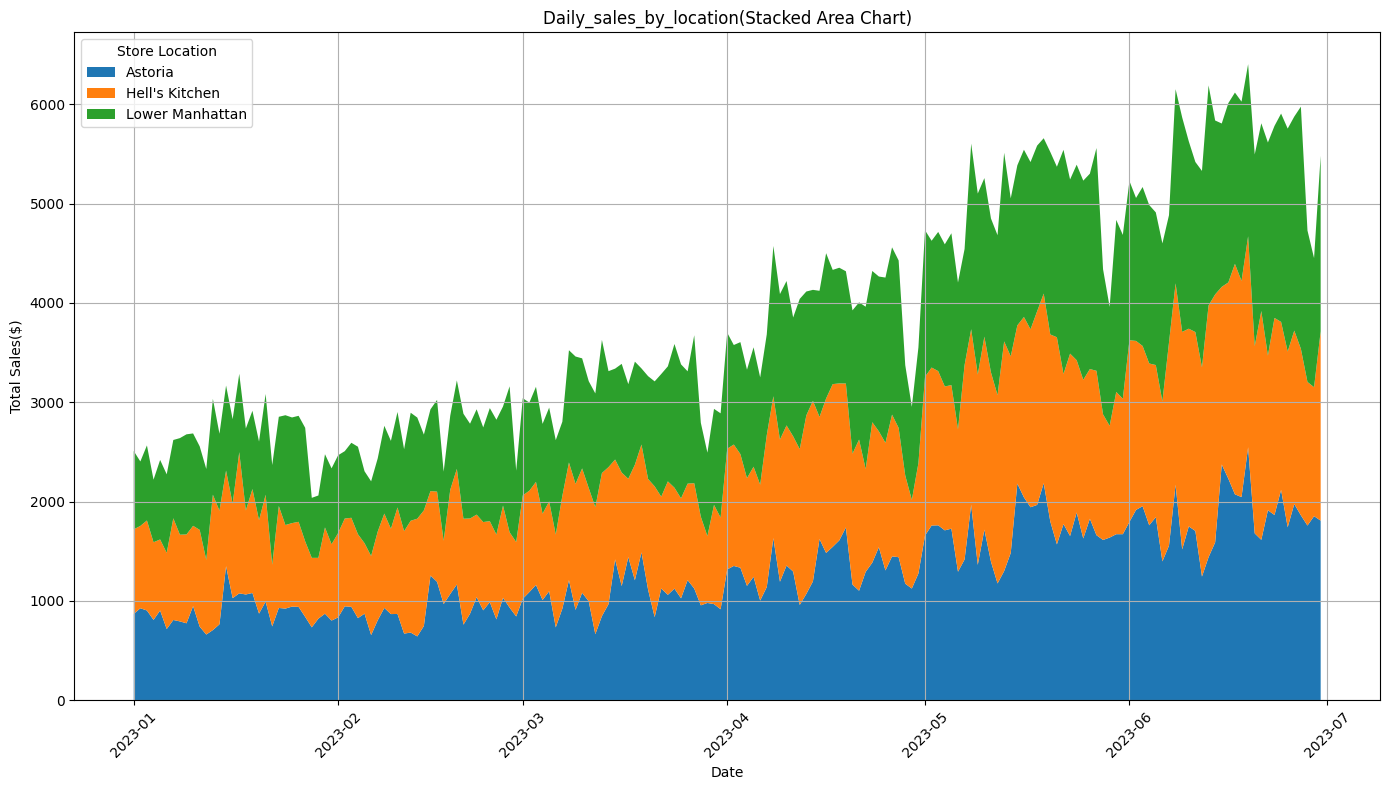

In [16]:
#stacked graph
plt.figure(figsize=(14,8))
plt.stackplot(Daily_sales_by_location.index, Daily_sales_by_location.T,labels=Daily_sales_by_location.columns)

plt.title('Daily_sales_by_location(Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel("Total Sales($)")
plt.legend(title='Store Location',loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Time Series Analysis

In [19]:
daily_sales=df.groupby('transaction_date')['sales'].sum().reset_index()
daily_sales

,transaction_date,sales
0,2023-01-01,2508.20
1,2023-01-02,2403.35
2,2023-01-03,2565.00
3,2023-01-04,2220.10
4,2023-01-05,2418.85
...,...,...
176,2023-06-26,5875.90
177,2023-06-27,5975.65
178,2023-06-28,4728.90
179,2023-06-29,4450.75


In [20]:
#creating 2 new column named 'day_of_week' & 'month'
df['day_of_week']=df['datetime'].dt.day_name()
df['month']=df['datetime'].dt.to_period('M')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime,day_of_week,month
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,2023-01-01 07:06:11,Sunday,2023-01
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01-01 07:08:56,Sunday,2023-01
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,2023-01-01 07:14:04,Sunday,2023-01
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,2023-01-01 07:20:24,Sunday,2023-01
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,2023-01-01 07:22:41,Sunday,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,0 days 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,2023-06-30 20:18:41,Friday,2023-06
149112,149453,2023-06-30,0 days 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,2023-06-30 20:25:10,Friday,2023-06
149113,149454,2023-06-30,0 days 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,2023-06-30 20:31:34,Friday,2023-06
149114,149455,2023-06-30,0 days 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,2023-06-30 20:57:19,Friday,2023-06


In [21]:
daily_sales=df.groupby('transaction_date')['sales'].sum().reset_index()


#df['day_of_week']=df['datetime'].dt.day_name()
weekly_sales=df.groupby('day_of_week')['sales'].sum().reindex(['Monday','Tuesday','Wendesday','Thuresday','Friday','Saturday','Sunday']).reset_index()


#df['month']=df['datetime'].dt.to_period('M')
monthly_sales=df.groupby('month')['sales'].sum().reset_index()

daily_sales,weekly_sales,monthly_sales

(    transaction_date    sales
 0         2023-01-01  2508.20
 1         2023-01-02  2403.35
 2         2023-01-03  2565.00
 3         2023-01-04  2220.10
 4         2023-01-05  2418.85
 ..               ...      ...
 176       2023-06-26  5875.90
 177       2023-06-27  5975.65
 178       2023-06-28  4728.90
 179       2023-06-29  4450.75
 180       2023-06-30  5481.32
 
 [181 rows x 2 columns],
   day_of_week      sales
 0      Monday  101677.28
 1     Tuesday   99455.94
 2   Wendesday        NaN
 3   Thuresday        NaN
 4      Friday  101373.00
 5    Saturday   96894.48
 6      Sunday   98330.31,
      month      sales
 0  2023-01   81677.74
 1  2023-02   76145.19
 2  2023-03   98834.68
 3  2023-04  118941.08
 4  2023-05  156727.76
 5  2023-06  166485.88)

## 2] Monthly Sales Data Visualization

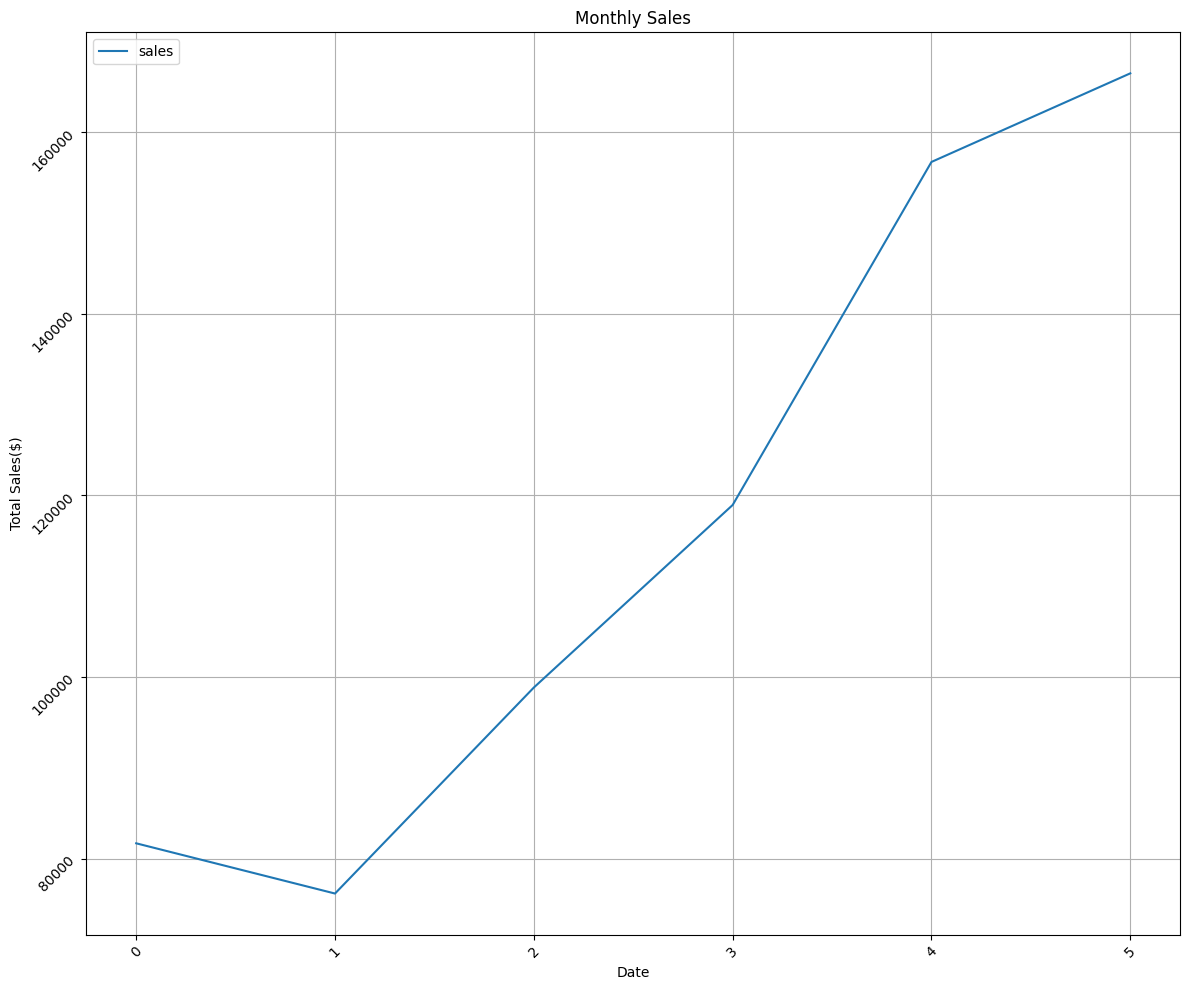

In [22]:
monthly_sales.plot(figsize=(12,10),title='Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales($)')
plt.grid(True)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

plt.show()


In [23]:
daily_sales=df.groupby('transaction_date')['sales'].sum().reset_index()


#df['day_of_week']=df['datetime'].dt.day_name()
weekly_sales=df.groupby('day_of_week')['sales'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()


#df['month']=df['datetime'].dt.to_period('M')
monthly_sales=df.groupby('month')['sales'].sum().reset_index()

daily_sales,weekly_sales,monthly_sales

(    transaction_date    sales
 0         2023-01-01  2508.20
 1         2023-01-02  2403.35
 2         2023-01-03  2565.00
 3         2023-01-04  2220.10
 4         2023-01-05  2418.85
 ..               ...      ...
 176       2023-06-26  5875.90
 177       2023-06-27  5975.65
 178       2023-06-28  4728.90
 179       2023-06-29  4450.75
 180       2023-06-30  5481.32
 
 [181 rows x 2 columns],
   day_of_week      sales
 0      Monday  101677.28
 1     Tuesday   99455.94
 2   Wednesday  100313.54
 3    Thursday  100767.78
 4      Friday  101373.00
 5    Saturday   96894.48
 6      Sunday   98330.31,
      month      sales
 0  2023-01   81677.74
 1  2023-02   76145.19
 2  2023-03   98834.68
 3  2023-04  118941.08
 4  2023-05  156727.76
 5  2023-06  166485.88)

In [24]:
weekly_sales=df.groupby(['day_of_week','store_location'])['sales'].sum().unstack()
weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Friday,33472.75,34743.18,33157.07
Monday,33928.29,33389.51,34359.48
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50
Thursday,34140.37,33468.06,33159.35
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82


In [25]:
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly_sales=weekly_sales.reindex(days_order)
weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


## 3] Weekly Sales Data Visualization

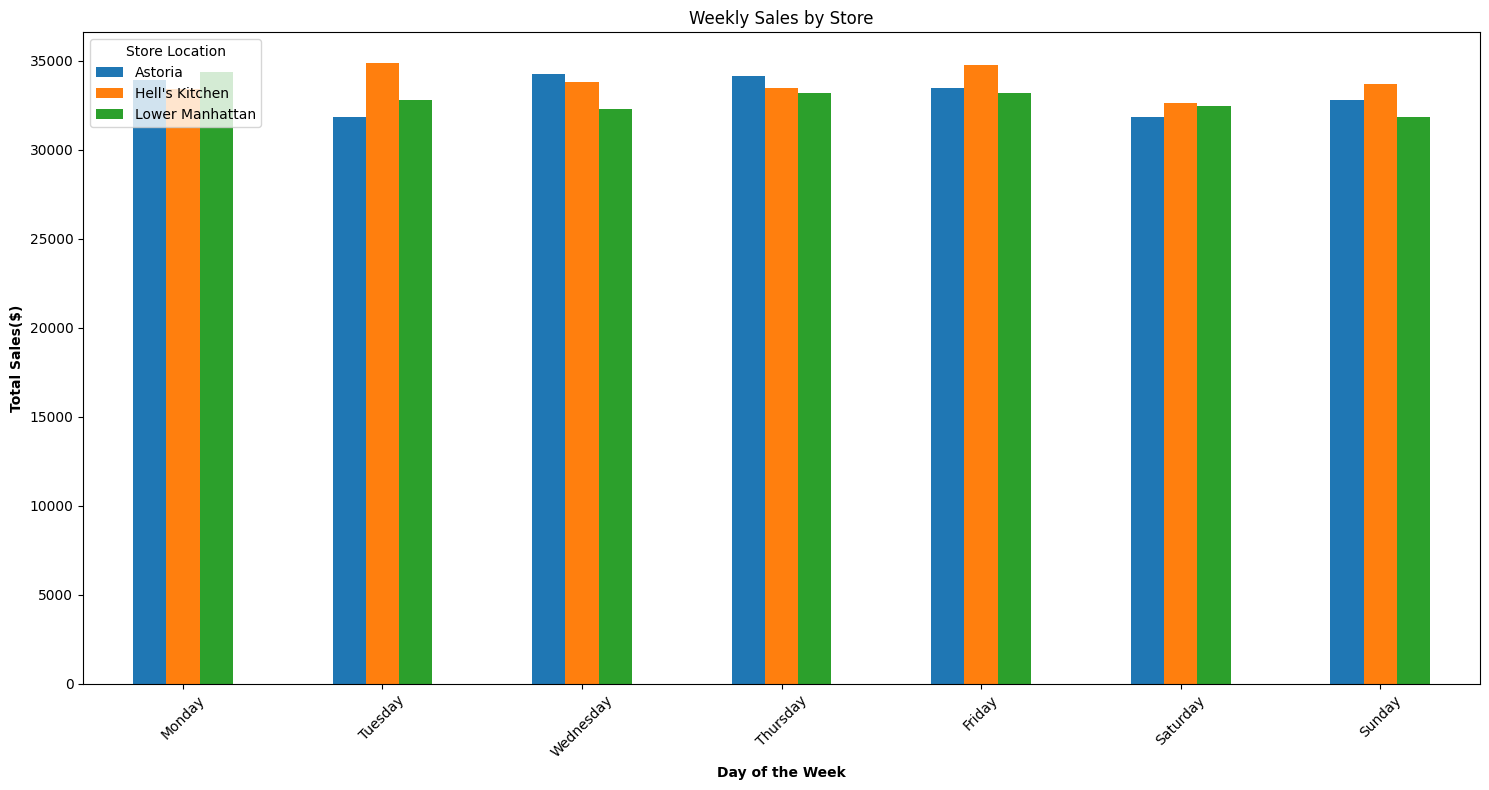

In [26]:
weekly_sales[["Astoria","Hell's Kitchen","Lower Manhattan"]].plot(kind="bar",figsize=(15,8),title='Weekly Sales by Store')

plt.xlabel('Day of the Week',fontweight='bold')
plt.ylabel('Total Sales($)',fontweight='bold')
#plt.grid(True)
plt.legend(title='Store Location',loc="upper left")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [27]:
df_category=df.groupby('product_category').agg({'sales':'sum','transaction_id':'count'}).sort_values('sales',ascending=False)
df_category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


## 4] Hourly Sales Data vizualization

In [47]:
df['hour']=df['datetime'].dt.hour
Hourly_sales_by_product=df.groupby(['hour','product_category'])['sales'].sum().unstack()
Hourly_sales_by_product

product_category,Bakery,Branded,Coffee,Coffee beans,Drinking Chocolate,Flavours,Loose Tea,Packaged Chocolate,Tea
hour,,,,,,,,,
6,2677.95,406.0,7811.95,874.45,2770.50,430.4,614.45,258.52,6056.05
7,7948.44,1754.0,23579.90,3602.20,6507.25,985.6,1229.05,680.18,17239.85
8,10417.84,2098.0,30579.85,5444.75,8166.00,1224.8,1403.85,605.78,22759.00
9,10523.91,2035.0,31014.85,7353.25,7787.50,1176.0,2072.15,383.82,22823.05
10,10982.50,1745.0,33297.10,7608.70,8070.50,1532.8,1608.45,799.79,23028.55
11,5612.06,532.0,18188.15,3295.20,4853.75,427.2,457.95,248.88,12703.95
12,4180.44,470.0,16162.90,1384.15,4416.50,333.6,476.50,101.60,12667.10
13,4421.08,966.0,16620.95,1566.65,4415.00,339.2,458.55,260.12,11319.90
14,4740.46,428.0,16725.35,1573.95,4637.50,356.8,471.30,238.88,12132.50


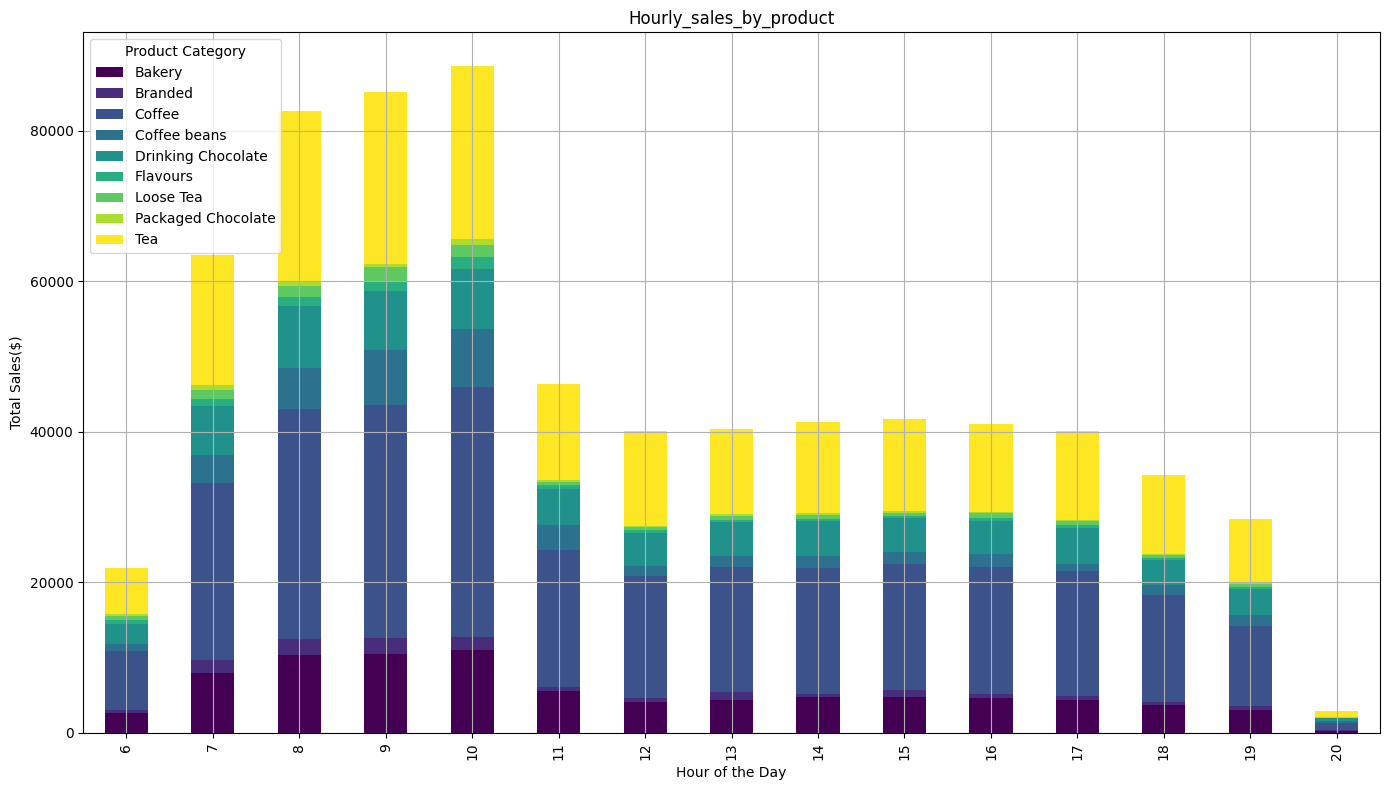

In [29]:
Hourly_sales_by_product.plot(kind='bar',title="Hourly_sales_by_product",stacked=True,figsize=(14,8),colormap='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales($)')
plt.legend(title='Product Category',loc='upper left')
plt.grid(True)
plt.tight_layout()

## Calculate Average Sales per Transaction

In [30]:
# we have created df_category above :
#df_category=df.groupby('product_category').agg({'sales':'sum','transaction_id':'count'}).sort_values('sales',ascending=False)


df_category['avg_sales']=df_category['sales']/df_category['transaction_id']
df_category

,sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


## Sales by Product Type

In [31]:
sales_by_product=df.groupby('product_type').agg({'sales': 'sum','unit_price':'mean'}).sort_values('sales',ascending=False)
sales_by_product

,sales,unit_price
product_type,,
Barista Espresso,91406.20,3.655200
Brewed Chai tea,77081.95,2.936993
Hot chocolate,72416.00,4.148827
Gourmet brewed coffee,70034.60,2.696641
Brewed Black tea,47932.00,2.744670
Brewed herbal tea,47539.50,2.744731
Premium brewed coffee,38781.15,3.122452
Organic brewed coffee,37746.50,2.898021
Scone,36866.12,3.534638


## 5] Product  Sales by Product Type Data Visualization

In [32]:
product_sales_df=df.groupby(['product_category','product_type'])['sales'].sum().reset_index()
product_sales_df


,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


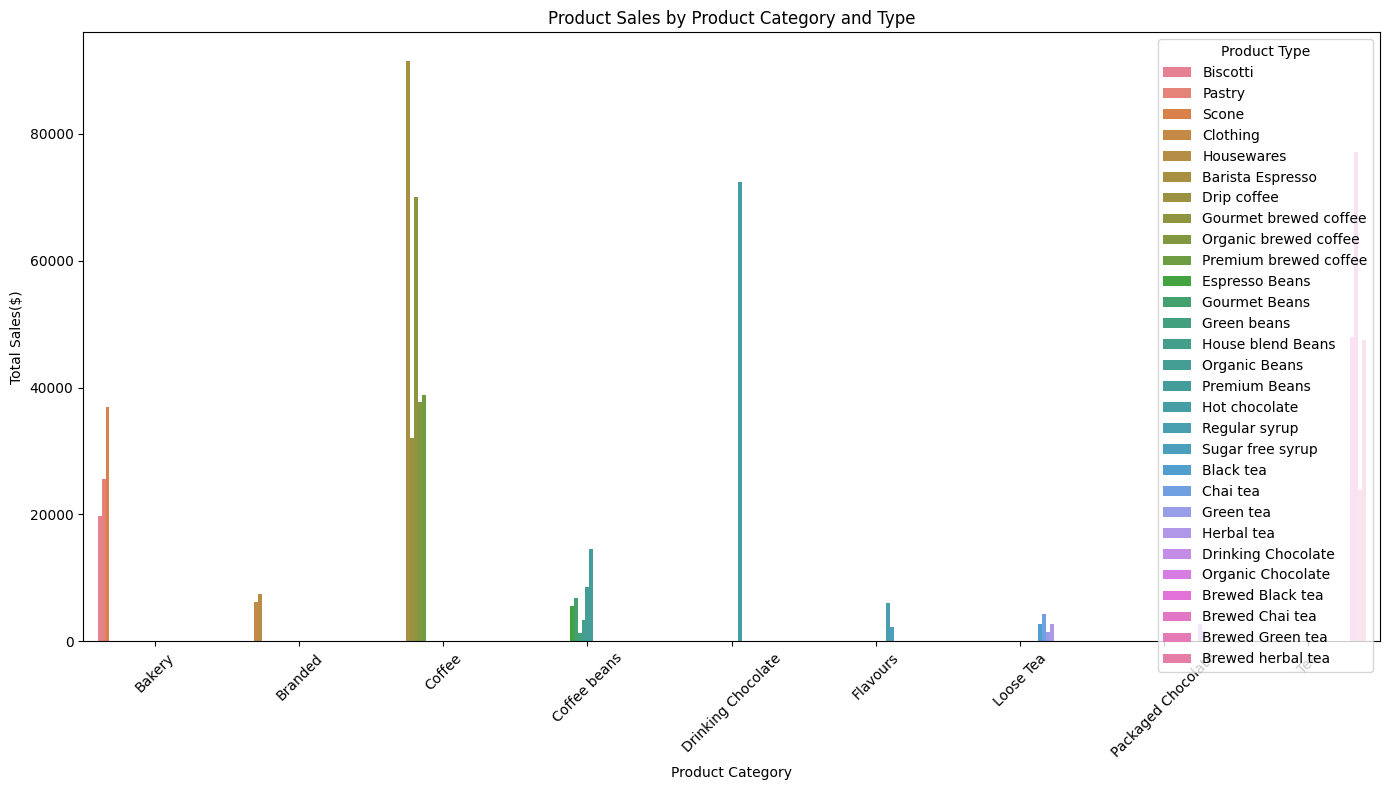

In [33]:
plt.figure(figsize=(14,8))
sns.barplot(data=product_sales_df, x='product_category', y='sales', hue='product_type')

plt.title('Product Sales by Product Category and Type')
plt.xlabel('Product Category')
plt.ylabel('Total Sales($)')
plt.legend(title='Product Type',loc='upper right')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# we have many categorie it's congested ,its hard to see.
# we will create bar chart for each of those product categories seperatly and we will create loop which will create all charts for us .

In [34]:
# 1. we need to get unique of product categories. 
categories=product_sales_df['product_category'].unique()
categories

array(['Bakery', 'Branded', 'Coffee', 'Coffee beans',
       'Drinking Chocolate', 'Flavours', 'Loose Tea',
       'Packaged Chocolate', 'Tea'], dtype=object)

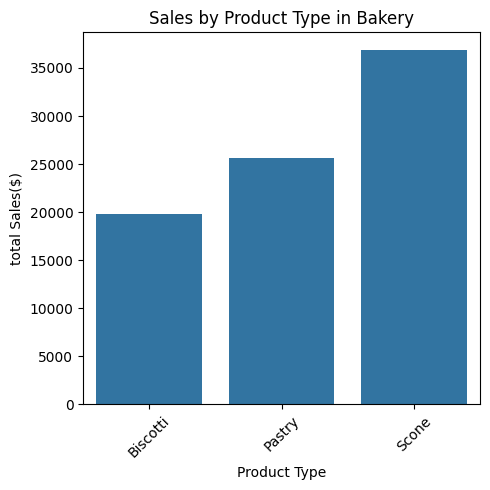

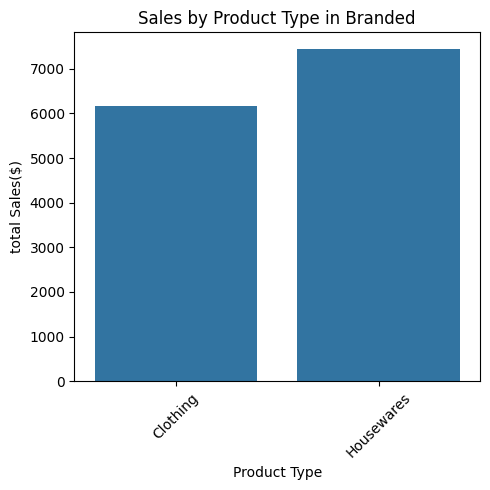

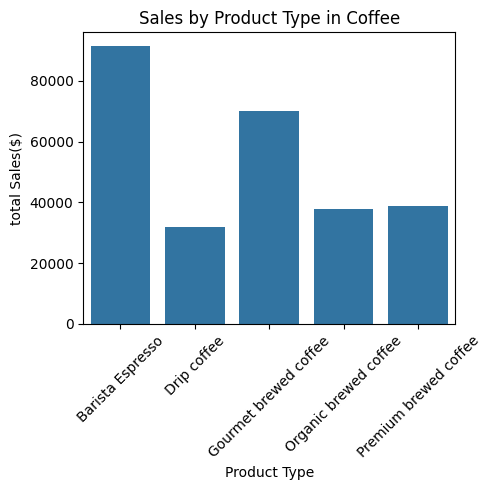

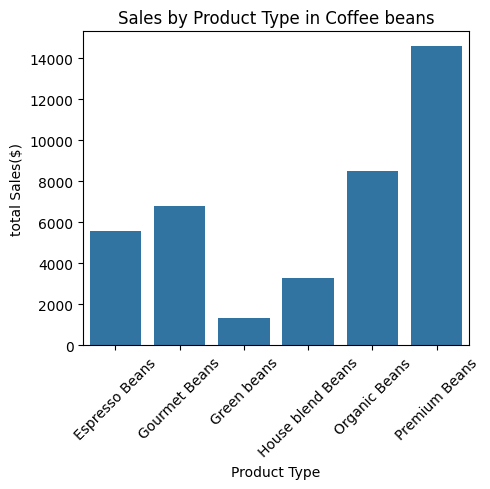

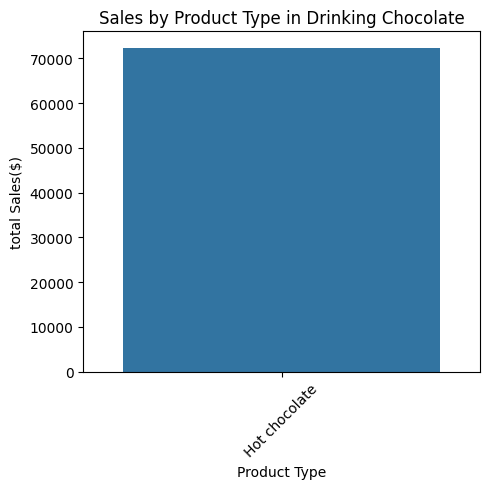

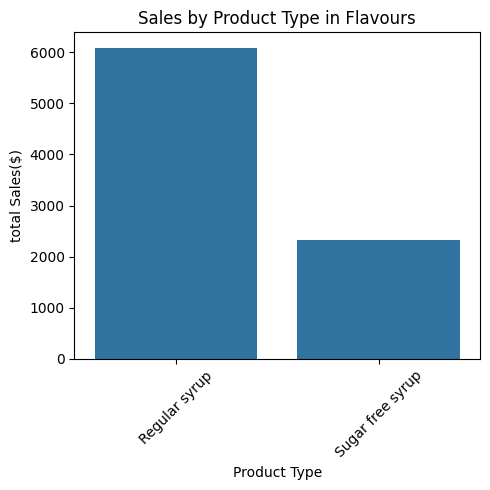

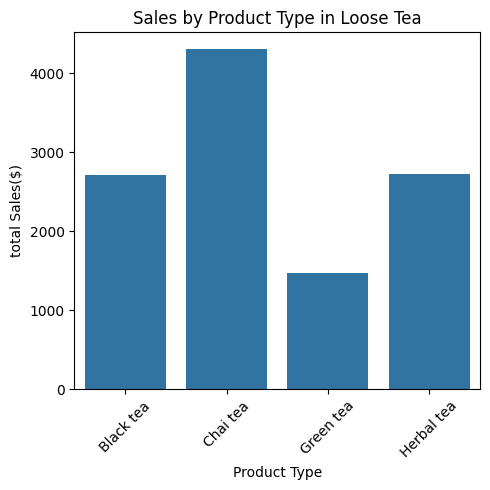

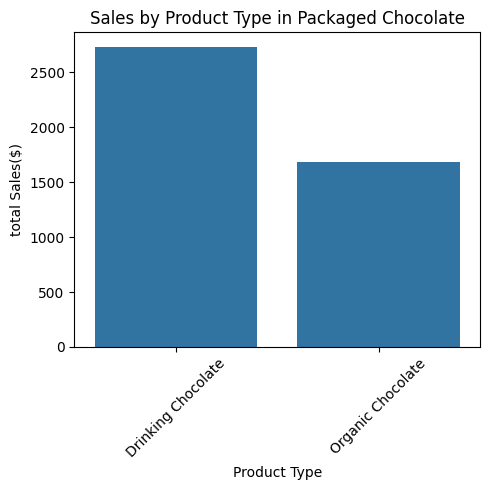

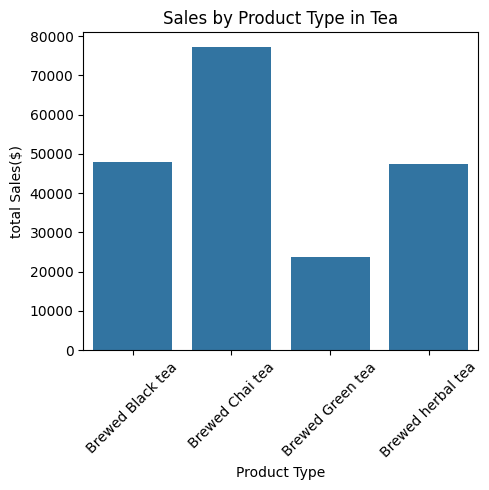

In [35]:
# 2. now we will create loop to create seperate bar charts for each categories

for cat in categories:
    plt.figure(figsize=(5,5))
    category_data=product_sales_df[product_sales_df['product_category']==cat]
    sns.barplot(data=category_data,x='product_type', y='sales')

    plt.title(f'Sales by Product Type in {cat}')
    plt.xlabel('Product Type')
    plt.ylabel('total Sales($)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

## 6] Hourly Sales by Location Data Viz

In [38]:
#df['hour']=df['datetime'].dt.hour

hourly_sales_by_location=df.groupby(['hour','store_location'])['sales'].sum().unstack()
hourly_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
hour,,,
6,NaN,7531.17,14369.10
7,19028.80,15961.05,28536.62
8,22805.90,31544.44,28349.53
9,23183.57,32874.29,29111.67
10,24426.12,33605.81,30641.46
11,15498.13,17926.54,12894.47
12,15681.20,11343.10,13168.49
13,15947.87,12070.10,12349.48
14,15175.27,12297.50,13831.97


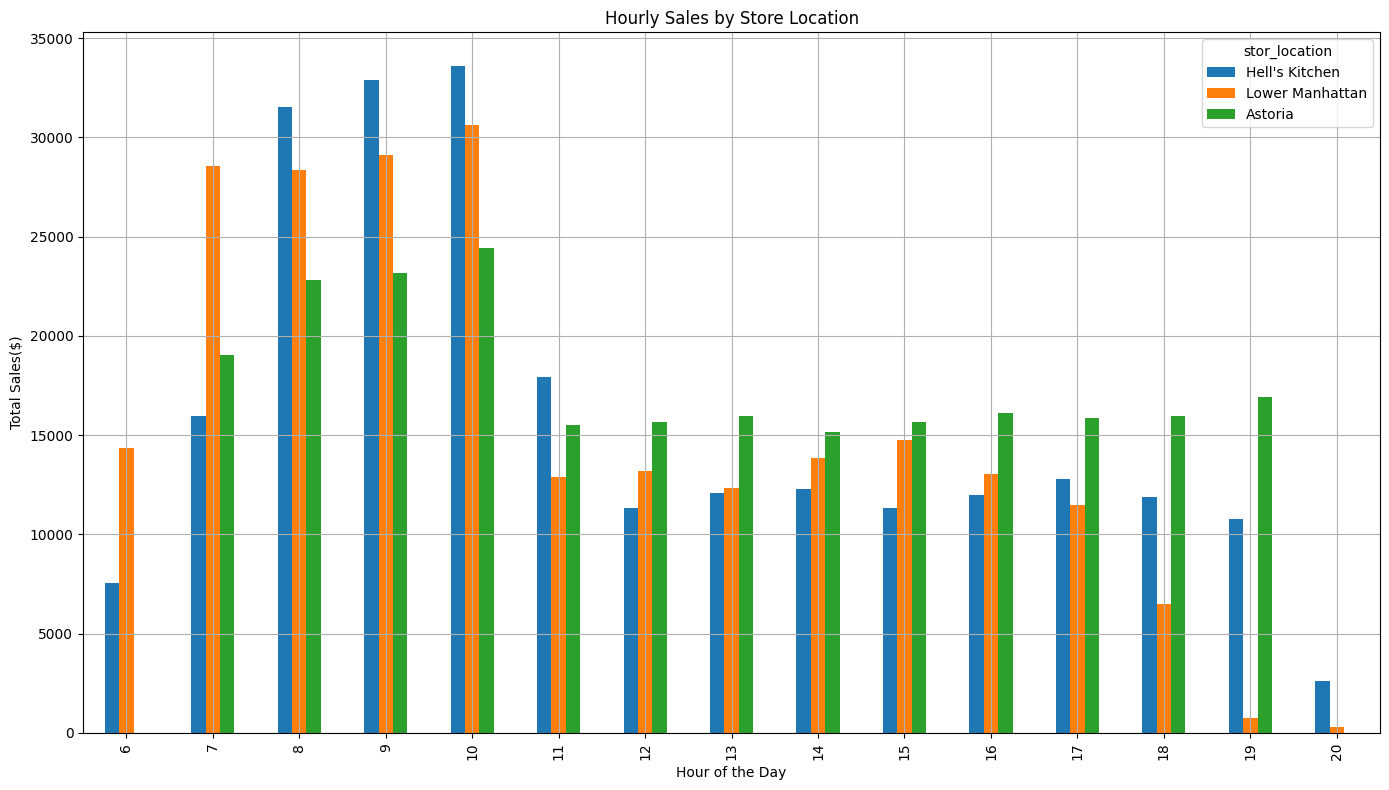

In [73]:
#plt.figure(figsize=(14,8))
#sns.barplot(data=hourly_sales_by_location,x='hour',y='sales',hue='store_location')
#sns.barplot(data=category_data,   x='product_type', y='sales')

#hourly_sales_by_location[["Astoria","Hell's Kitchen","Lower Manhattan"]].plot(kind="bar",figsize=(14,8))

hourly_sales_by_location[["Hell's Kitchen","Lower Manhattan","Astoria"]].plot(kind="bar",figsize=(14,8))

plt.title('Hourly Sales by Store Location')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales($)')
plt.legend(title='stor_location',loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [74]:
# "astoria" work from 7 am - 8 pm ,where  "Hell's Kitchen","Lower Manhattan" time are 6am -8pm .
# but "astoria" has more sales than other stores
#   "Hell's Kitchen"does high sales between aam -10am .
# 

In [ ]:
# we can also use pie chat and donut chart ,but its not so much useful when we have so many categories